### App Rating Prediction

In [2]:
#Load the data file using pandas.
import pandas as pd
data = pd.read_csv('googleplaystore.csv')

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#Check for null values in the data. Get the number of null values for each column.
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
#Drop records with nulls in any of the columns. 
data = data.dropna()

In [6]:
#Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [7]:
#Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).
data['Reviews'] = data['Reviews'].astype(int)
data['Last Updated'] = data['Last Updated'].astype('datetime64[ns]')

In [8]:
data['fal'] = data['Size'].str.strip().str[-1]
data['fal'].unique()

array(['M', 'e', 'k'], dtype=object)

In [9]:
data = data.drop("fal",axis=1)

In [10]:
#Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.
def convert_to_float(x):
    if type(x) == int or type(x) == float:
        return x
    if 'k' in x:
        if len(x) > 1:
            return float(x.replace('k', ''))
        return 1.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000
        return 1000.0
    if 'e' in x:
        return 0.0

data['Size'] = data['Size'].apply(convert_to_float)

In [12]:
data.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10834,FR Calculator,FAMILY,4.0,7,2600.0,500+,Free,0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100+,Free,0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.0,"10,000,000+",Free,0,Everyone,Lifestyle,2018-07-25,Varies with device,Varies with device


In [21]:
#Installs field is currently stored as string and has values like 1,000,000+. 
#Treat 1,000,000+ as 1,000,000
#remove ‘+’, ‘,’ from the field, convert it to integer
data['Installs'] = data['Installs'].str.replace('+','')
data['Installs'] = data['Installs'].str.replace(',','')
data['Installs'] = data['Installs'].astype(int)

In [14]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [19]:
#Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.
data['Price'] = data['Price'].str.replace('$','')
data['Price'] = data['Price'].astype(float)

C:\Users\ashwi\AppData\Local\Temp\ipykernel_20456\3588735253.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace('$','')


In [16]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000.0,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000.0,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9360 non-null   object        
 1   Category        9360 non-null   object        
 2   Rating          9360 non-null   float64       
 3   Reviews         9360 non-null   int32         
 4   Size            9360 non-null   float64       
 5   Installs        9360 non-null   int32         
 6   Type            9360 non-null   object        
 7   Price           9360 non-null   float64       
 8   Content Rating  9360 non-null   object        
 9   Genres          9360 non-null   object        
 10  Last Updated    9360 non-null   datetime64[ns]
 11  Current Ver     9360 non-null   object        
 12  Android Ver     9360 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(7)
memory usage: 950.6+ KB


## Sanity Checks

In [29]:
#Average rating should be between 1 and 5 as only these values are allowed on the play store. 
#Drop the rows that have a value outside this range.
data1 = data[(data['Rating'] > 5.0) & (data['Rating'] < 1.0)].index
data.drop(data1, inplace = True)
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,50000,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,1000000,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.0,10000,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3 and up


In [30]:
#Reviews should not be more than installs as only those who installed can review the app.
#If there are any such records, drop them.
data2 = data[(data['Reviews']>data['Installs'])].index
data.drop(data2, inplace=True)
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,50000,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,1000000,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.0,10000,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3 and up


In [32]:
#For free apps (type = “Free”), the price should not be >0. Drop any such rows.
data3 = data[(data['Type'] == "Free") & (data['Price'] > 0)].index
data.drop(data3, inplace=True)
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,50000,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,1000000,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.0,10000,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3 and up


## Performing univariate analysis & Removing Outliers

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:>

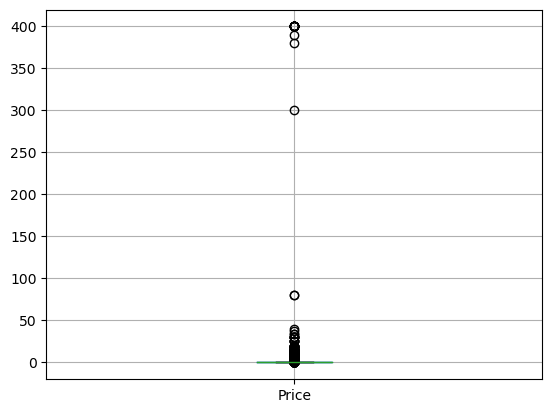

In [37]:
#Boxplot for Price
data.boxplot(column = ['Price'])

In [38]:
# Remove outliers
# easy way to remove outliers
def outliers (data,col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data= data.loc[~((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))),]
    return data

data = data.loc[data["Price"] < 200 ,]

<AxesSubplot:>

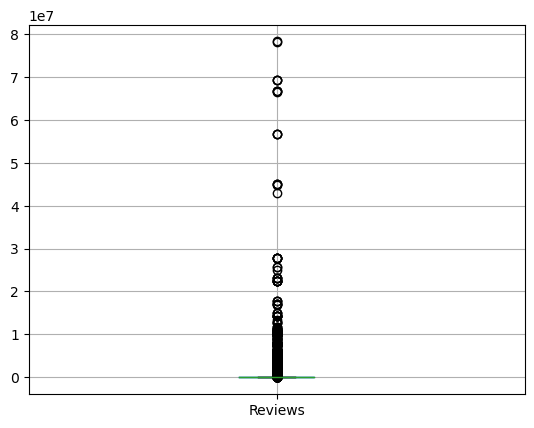

In [39]:
#Boxplot for Reviews
data.boxplot(column = ['Reviews'])

In [40]:
# Remove outliers
data = outliers(data,"Reviews")

(array([  17.,   18.,   41.,   74.,  136.,  442.,  853., 1526., 3046.,
        1557.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

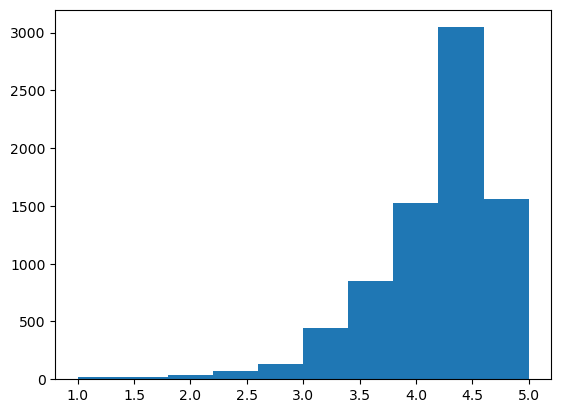

In [41]:
#Histogram for Rating
## It's left skewed (negetively skewed)
plt.hist(data["Rating"])

(array([3924., 1260.,  908.,  525.,  388.,  221.,  166.,   99.,   91.,
         128.]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000.]),
 <BarContainer object of 10 artists>)

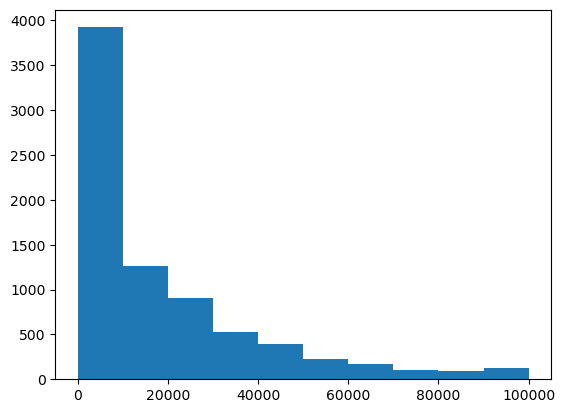

In [42]:
#Histogram for Size
## It's right skewed (positively skewed)
plt.hist(data["Size"])

### Bivariate analysis (Scatter plots)

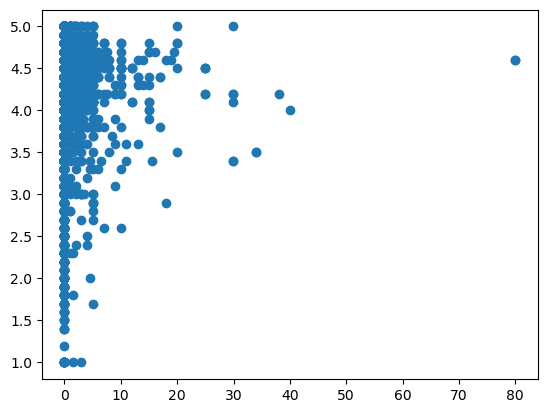

In [44]:
plt.scatter(data["Price"],data["Rating"])
# Very few products are there with high price (more than 60)

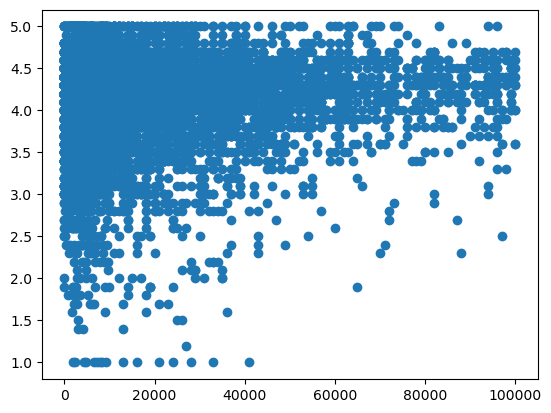

In [45]:
plt.scatter(data["Size"],data["Rating"])
# evenly distributed

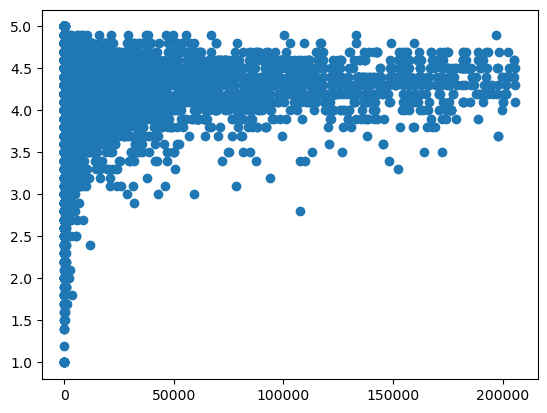

In [46]:
plt.scatter(data["Reviews"],data["Rating"])
# High number of reviews for high rating apps

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

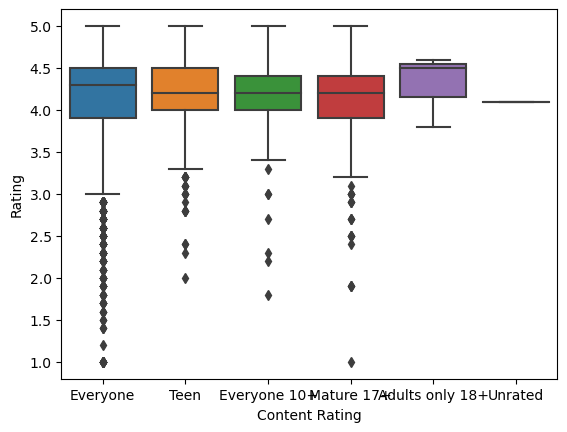

In [49]:
sns.boxplot(x=data['Content Rating'], y=data['Rating'])
# Few rating given by adults and above

<AxesSubplot:xlabel='Rating', ylabel='Category'>

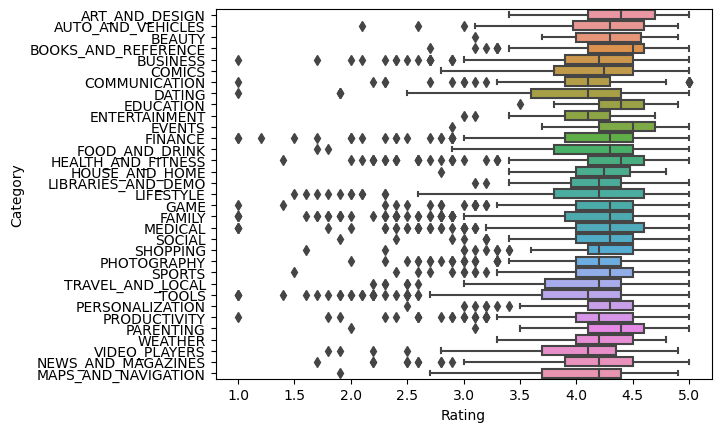

In [51]:
sns.boxplot(x=data['Rating'], y=data['Category'])
# evenly distributed
# It is showing the average rating for different category across the types. We don't find much of a significant differece. 

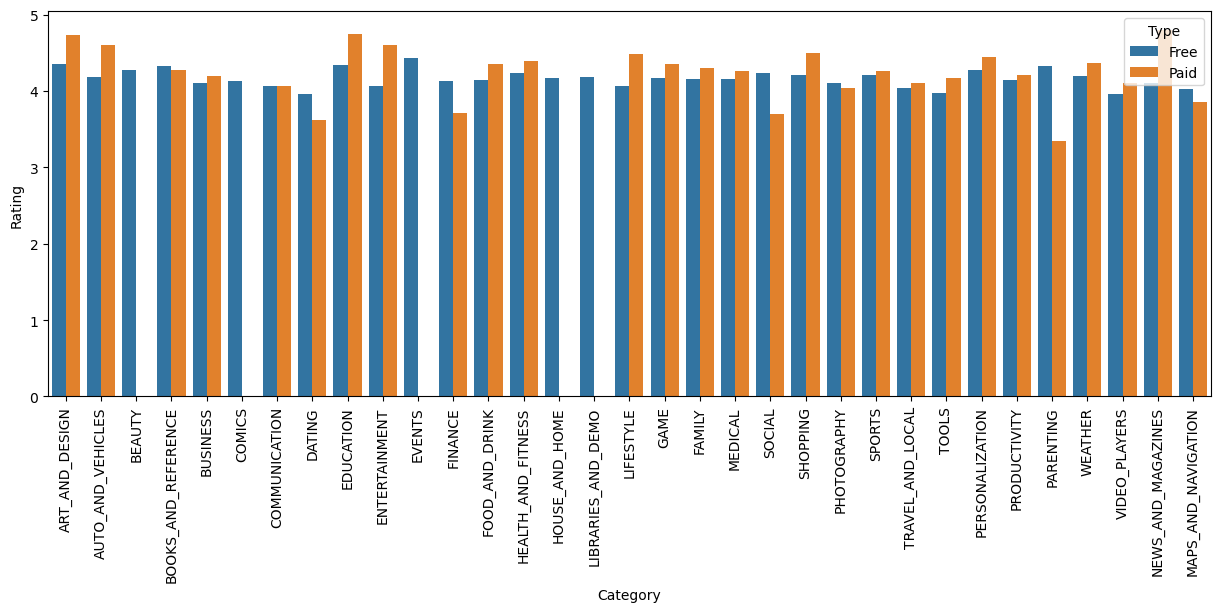

In [52]:
plt.figure(figsize=(15,5) )
sns.barplot(data=data, x="Category",y="Rating",dodge=True,ci=None,estimator=np.mean,hue="Type")
plt.xticks(rotation=90)
plt.show()

#It is showing the average rating for different category across the types. We don't find much of a significant difference. 

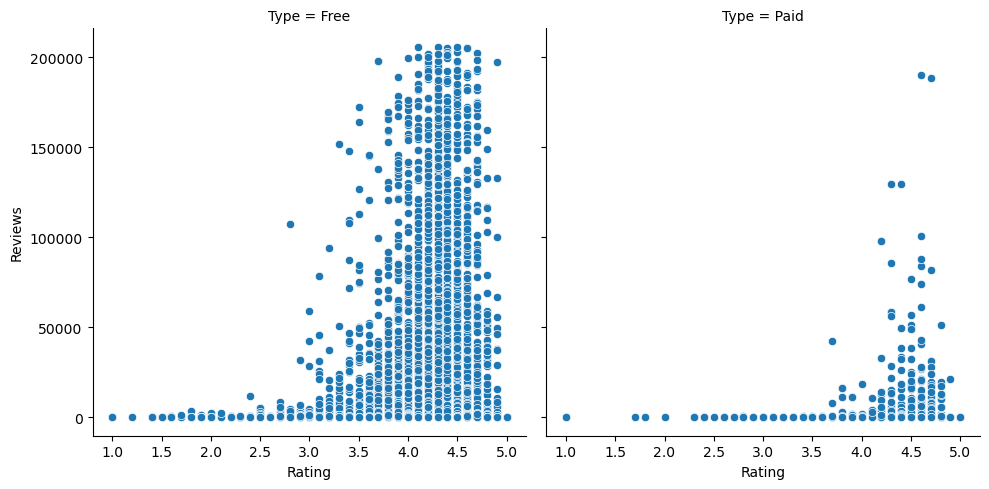

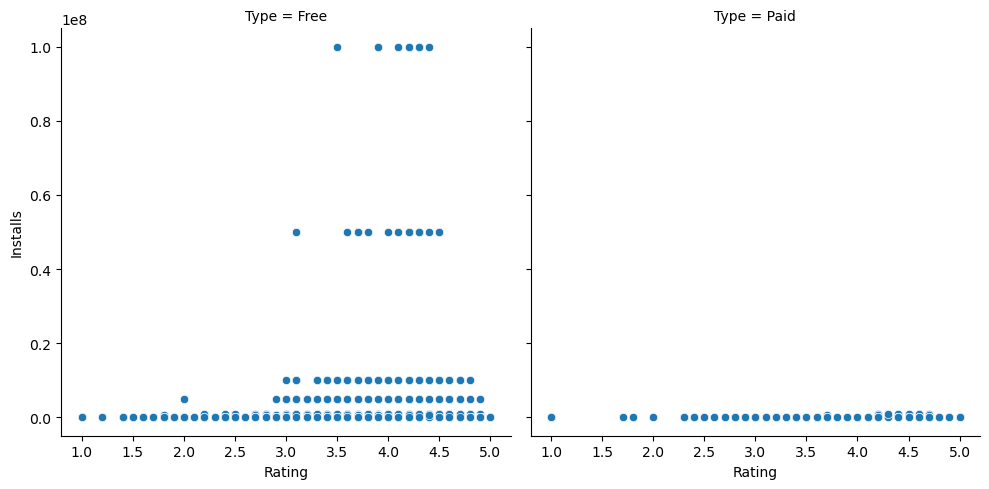

In [88]:
sns.relplot(data=data,x="Rating",y="Reviews" ,col="Type",kind="scatter")
sns.relplot(data=data,x="Rating",y="Installs" ,col="Type",kind="scatter")
plt.show()
# It seems thatwe don't much of a correlation in the variables

### Data Processing

In [99]:
p1 = data.copy()

In [100]:
# Log transformation since they are skewed
import numpy as np
p1["Reviews"] = np.log(p1["Reviews"])
p1["Installs"] = np.log(p1["Installs"])

In [101]:
# delete unnecessary columns
p1.drop(["App","Last Updated","Current Ver","Android Ver"],axis=1,inplace=True)

In [102]:
p1.head(2)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.068904,19000.0,9.210340,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.874198,14000.0,13.122363,Free,0.0,Everyone,Art & Design;Pretend Play


In [103]:
# create dummy variables
p2 = pd.get_dummies(data=p1,columns=['Category','Content Rating',"Genres","Type"],drop_first=True)

In [74]:
inp2.head(2)

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Type_Paid
0,4.1,1.623125,19000.0,9.210340,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,1.927775,14000.0,13.122363,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
#segregating ind and dep var
X = p2.drop("Rating",axis=1)
y = p2.loc[:,"Rating"]
from sklearn.model_selection import train_test_split
# Splitting
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size = 0.3, random_state = 123)

In [105]:
#Using linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_X, train_y)

LinearRegression()

In [106]:
# R sq value on train data is 0.144
print(f'r_sqr value: {lin_reg.score(train_X, train_y)}')

r_sqr value: 0.1408334155766049


In [107]:
# Predict
y_pred = lin_reg.predict(test_X)

In [108]:
d = pd.DataFrame()
d["test_y"] = test_y
d["y_pred"] = y_pred

###### mape with sklearn
#Mape with formula
d["mp"] = abs((d["test_y"]- d["y_pred"])/d["test_y"])
(d.mp.mean())*100#mape

10.427360919738353

In [109]:
# R sq value on test data is 0.106
print(f'r_sqr value: {lin_reg.score(test_X, test_y)}')

r_sqr value: 0.12486628989782456


## Conclusion

#### The R sq is pretty low, but the MAPE is quite high.